In [ ]:
# Importing Mydrive into google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the pandas, seaborn, matplotlib libraries
#from sklearn importing the datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# **A. Read both the Datasets "Data1" and "Data2" as DataFrame and store them into two separate variables.**


In [ ]:
# Loading the datasets Data1.csv and Data2.csv into two dataframes Data1 and Data2 using the pandas read_csv() function.
Data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MDSC-106/Banking_Marketing_Task_2/Data1.csv")
Data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MDSC-106/Banking_Marketing_Task_2/Data2.csv")

# **B. Print shape and Column Names and DataTypes of both the Dataframes.**

In [ ]:
# Printing the Shape of the Data frames using .shape attribute of dataframes.
print(Data1.shape,Data2.shape)

(5000, 8) (5000, 7)


In [ ]:
# Printing all the column names in each dataframe using dataframe.columns attribute
print("Data1 Columns: ",Data1.columns)
print("Data2 Columns: ",Data2.columns)

Data1 Columns:  Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Data2 Columns:  Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [ ]:
# Printing the datatypes present in both the data frames i.e Data1, Data2 dataframes.
print("Data types of Data1 data Frame: \n",Data1.dtypes)
print("\n")
print("Data types of Data2 data Frame:\n",Data2.dtypes)

Data types of Data1 Data Frame: 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


Data types of Data2 Data Frame:
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


# **C. Merge both the Dataframes on "ID" feature to form a single DataFrame.**

In [ ]:
# Merging both dataframes Data1, Data2 on the feature "ID" present in both dataframes.
Single_df = Data1.merge(Data2, how = "inner", on = "ID")
Single_df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


# **D. Change Datatype of below features to "Object" :**
* CreditCard
* InternetBanking
* FixedDepositAccount
* Security
* Level
* HiddenScore

*Reason behind performing this operation :- Values in these features are binary i.e. 1/0. But DataType is 'int'/'float' which is not expected.*



In [ ]:
# converting the datatypes of columns 'creditcard', 'internetbanking', 'fixeddepositaccount', 'security', 'level', 'hiddenscore' to object datatype using .astype function of the dataframes.
Single_df[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']] = Single_df[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']].astype(object)

In [ ]:
Single_df.dtypes
# Single_df

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

#**Data Exploration and Analysis:**

#**A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.**

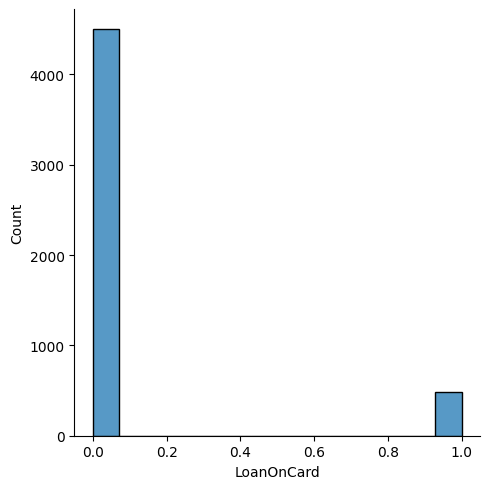

In [ ]:
#sns.displot() function is typically used to create a distribution plot (histogram or kernel density estimate) of the values in the "LoanOnCard" column of the DataFrame "Single_df" using the Seaborn library.
sns.displot(Single_df,x = "LoanOnCard")

<Axes: xlabel='LoanOnCard', ylabel='Count'>

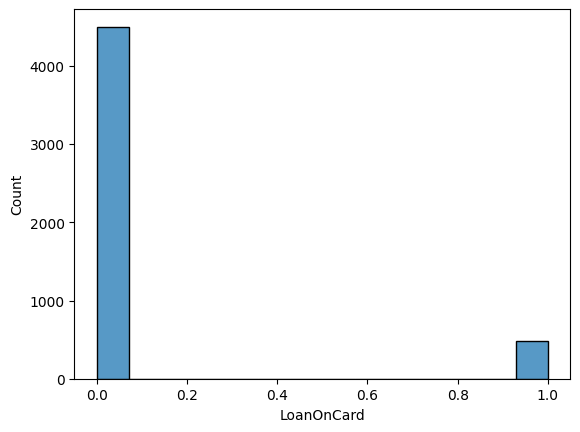

In [ ]:
# sns.histplot() function is is used to create a histogram of the values in the "LoanOnCard" column of the DataFrame "Single_df" using the Seaborn library.
sns.histplot(Single_df['LoanOnCard'])

# **Inference**
What I can infer from the above distribution table is the feature seems to be a Binomial Distribution, since the sample has many number of values and they only take values either 0 or 1, so I classify the distribution of it as Binomial.

#**B. Check the percentage of missing values and impute if required.**

In [ ]:
# Checking the missing values in a dataframe using .isna()
Single_df.isna()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking for null values in each column, if null values exist, True would be printed or else False would be printed.
print("Priniting true or false if a column has some null values.")
for element in Single_df.columns:
  print(element,"     :",Single_df[element].isnull().any())
# Single_df['Age'].isnull().any()

Priniting true or false if a column has some null values.
ID      : False
Age      : False
CustomerSince      : False
HighestSpend      : False
ZipCode      : False
HiddenScore      : False
MonthlyAverageSpend      : False
Level      : False
Mortgage      : False
Security      : False
FixedDepositAccount      : False
InternetBanking      : False
CreditCard      : False
LoanOnCard      : True


# **Printing the percentage of null values in the dataframe**

In [ ]:
missing_null_values = Single_df['LoanOnCard'].isnull().sum()
print("Count of missing  values or null values : ",missing_null_values)
missing_percentage = (missing_null_values / Single_df['LoanOnCard'].sum()) * 100
print("Missing Values percentage : ",missing_percentage,"%")

Count of missing  values or null values :  20
Missing Values percentage :  4.166666666666666 %


In [ ]:
# As LoanOnCard is binary values column with values either 0 or 1, we will try to impute the LoanOnCard column with binary values randomly.
bin_list = [0,1]

Single_df['LoanOnCard'].fillna(np.random.choice(bin_list), inplace = True)

* Checking whether are there any other null values in any columns of the data frame

In [ ]:
print("Priniting true or false if a column has some null values.")
for element in Single_df.columns:
  print(element,"     :",Single_df[element].isnull().any())
# Single_df['Age'].isnull().any()

Priniting true or false if a column has some null values.
ID      : False
Age      : False
CustomerSince      : False
HighestSpend      : False
ZipCode      : False
HiddenScore      : False
MonthlyAverageSpend      : False
Level      : False
Mortgage      : False
Security      : False
FixedDepositAccount      : False
InternetBanking      : False
CreditCard      : False
LoanOnCard      : False


In [ ]:
# Getting the mean, standard deviation, minimum, maximum values of each column in the data frame.
Single_df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800,0.10000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802,0.30003
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000,0.00000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.00000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.00000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.00000


In [ ]:
Single_df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,1.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,1.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,1.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,1.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


#**C. Check for unexpected values in each categorical variable and impute with best suitable value.**
* [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected
values which needs treatment ]

# **Functions for each plotting.**

In [ ]:
# Defining functions for line_plot
def line_plot(df,x_axis, y_axis):
  if(sns.lineplot(df,x = x_axis, y = y_axis)):
    sns.lineplot(df,x = x_axis,y = y_axis)
  else:
    return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for scatter_plot
def scatter_plot(df,x_axis,y_axis):
    if(sns.scatterplot(data = df,x = x_axis, y = y_axis)):
      sns.scatterplot(data = df,x = x_axis, y = y_axis)
    else:
      return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for hist_plot
def hist_plot(df, x_axis, y_axis):
    if(sns.histplot(data = df,x = x_axis, y = y_axis,kde = True)):
      sns.histplot(data = df,x = x_axis, y = y_axis, kde = True)
    else:
      return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for box_plot
def box_plot(df, x_axis, y_axis):
  if(sns.boxplot(data = df, x = x_axis, y = y_axis)):
    sns.boxplot(data = df, x = x_axis, y = y_axis)
  else:
    return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for bar_plot
def bar_plot(df, x_axis, y_axis):
  if(sns.barplot(data = df, x = x_axis, y = y_axis)):
    sns.barplot(data = df, x = x_axis, y = y_axis)
  else:
    return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for pair_plot
def pair_plot(df):
  if(sns.pairplot(data = df)):
    sns.pairplot(data = df)
  else:
    return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for heatmap_plot
def heat_map(df):
  if(sns.heatmap(data = df)):
    sns.heatmap(data = df, annot = True, linewidth = .5,cmap = "crest")
  else:
    return("Function called cannot plot a graph with specified parameters")

In [ ]:
# Defining functions for joint_plot
def joint_plot(df, x_axis, y_axis):
  if(sns.jointplot(data = df, x = x_axis, y = y_axis)):
    sns.jointplot(data = df, x = x_axis, y = y_axis)
  else:
    return("Function called cannot plot a graph with specified parameters")

<ipython-input-40-b220be26a471>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(Single_df.columns),3,count)
<ipython-input-40-b220be26a471>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(Single_df.columns),3,count)
<ipython-input-40-b220be26a471>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(Single_df.columns),3,count)
<ipython-input-40-b220be26a471>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(Single_df.column

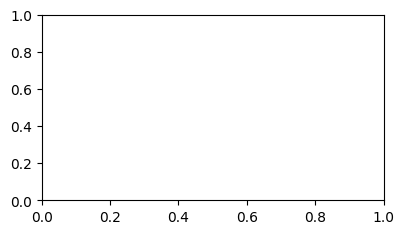

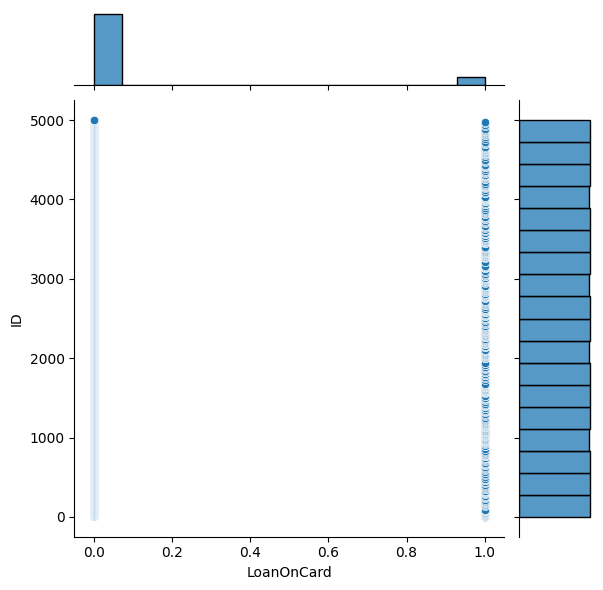

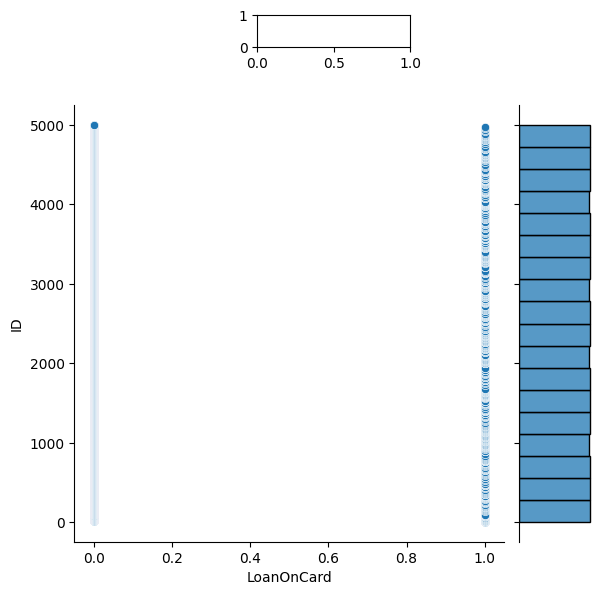

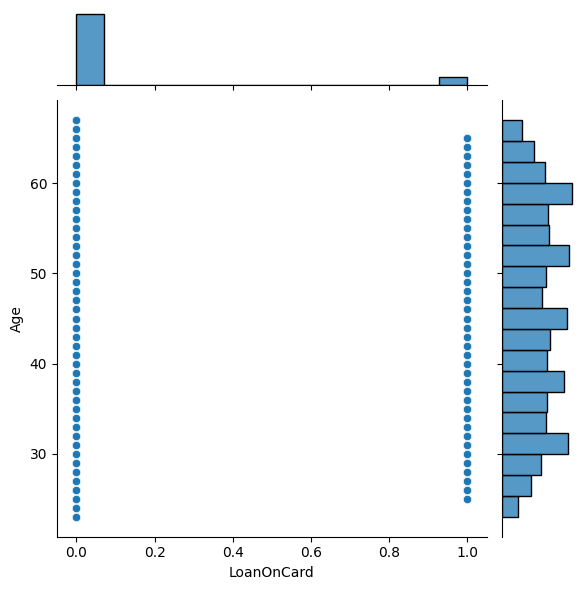

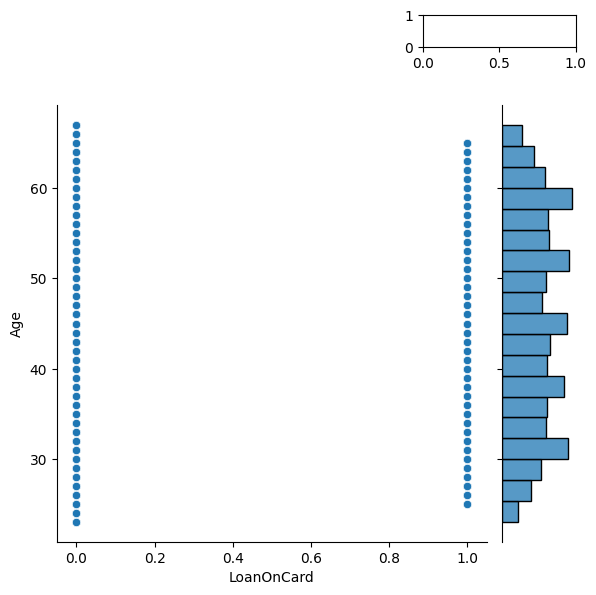

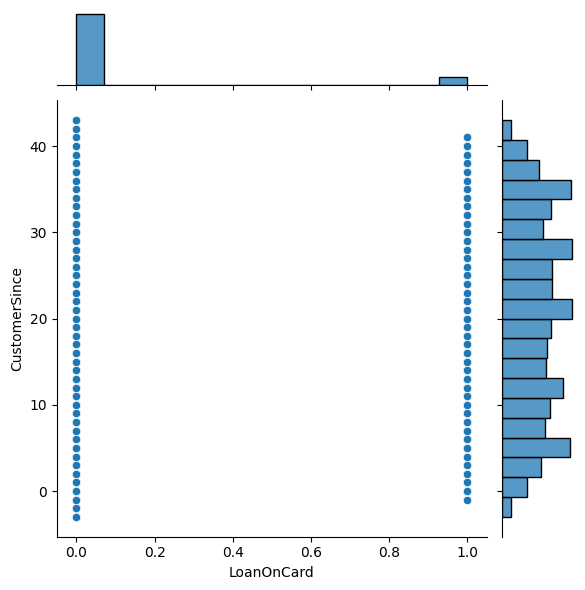

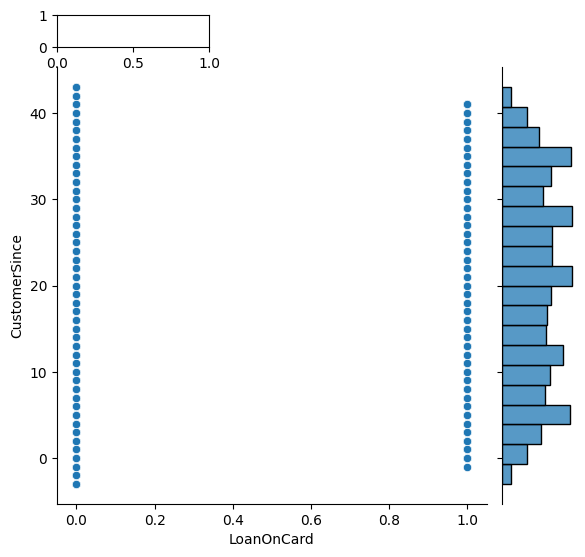

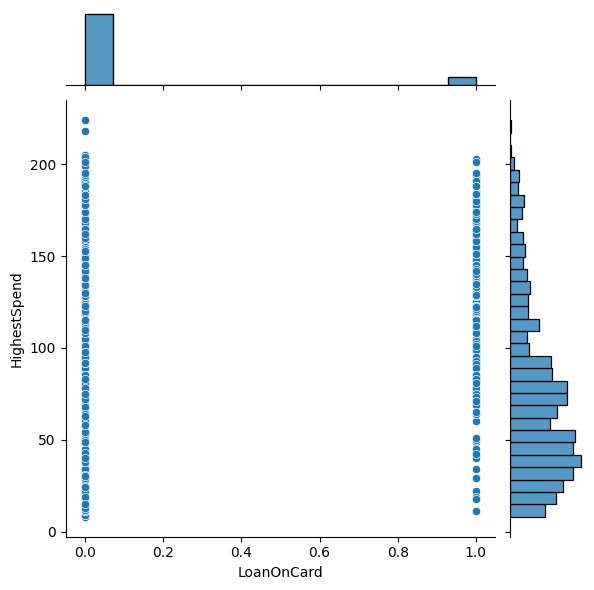

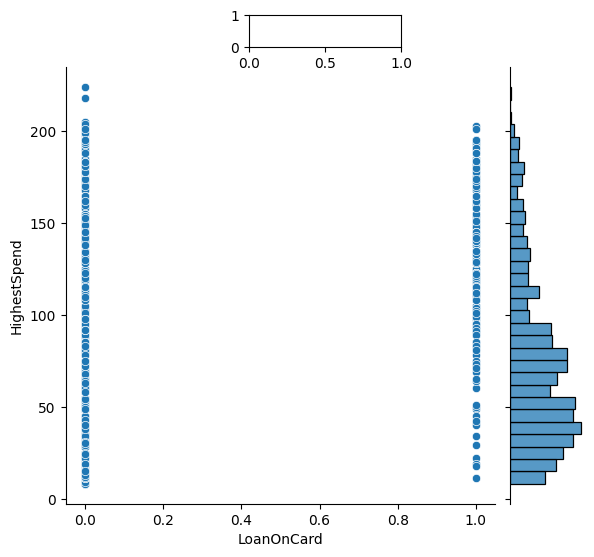

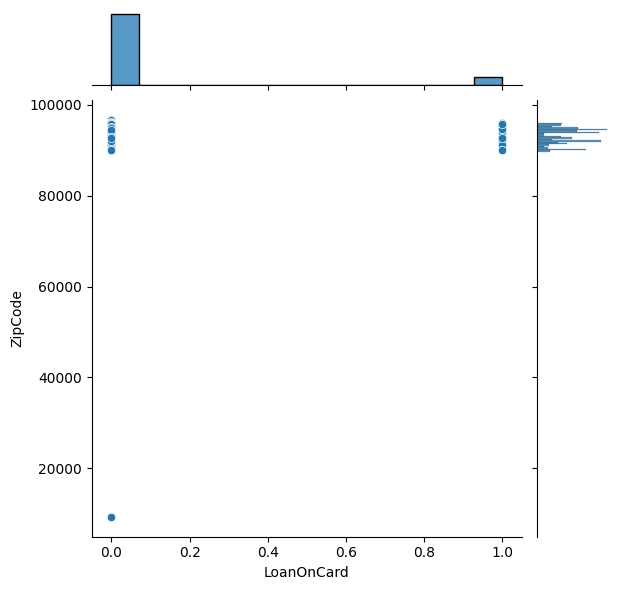

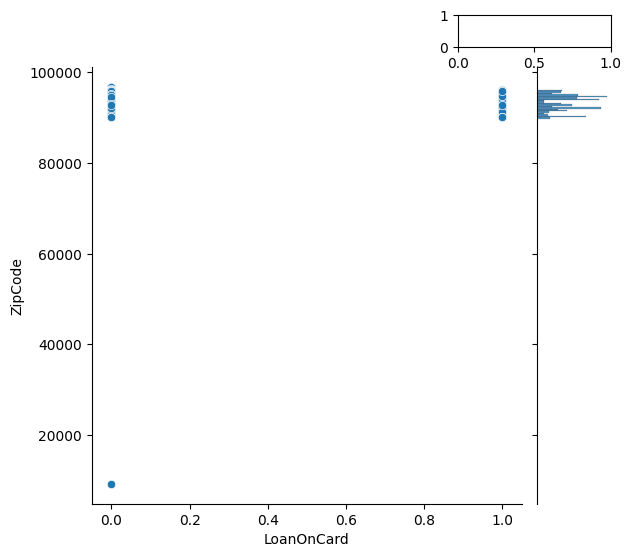

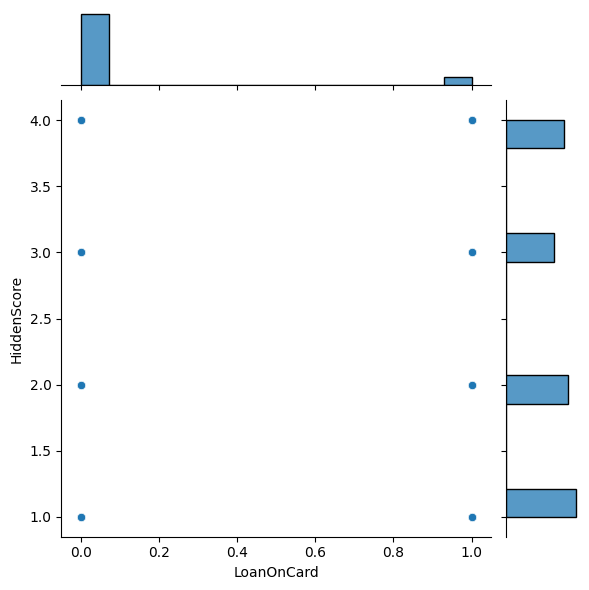

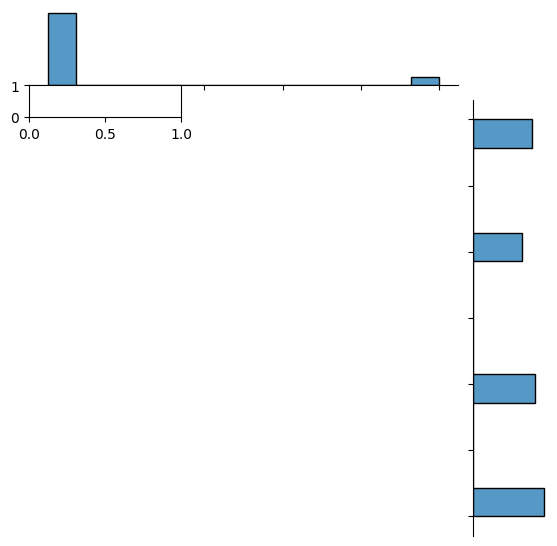

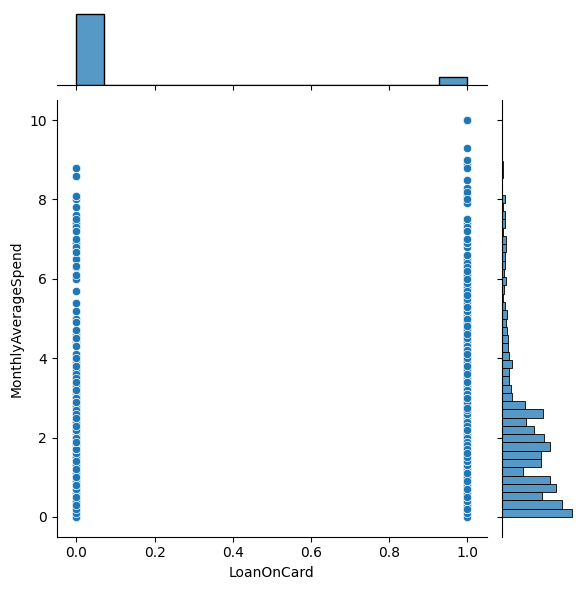

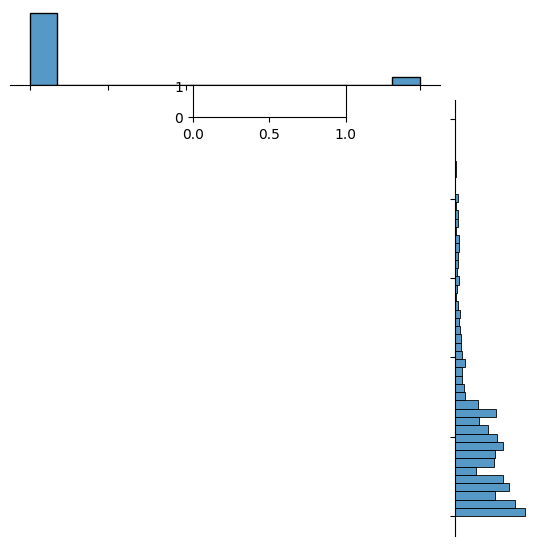

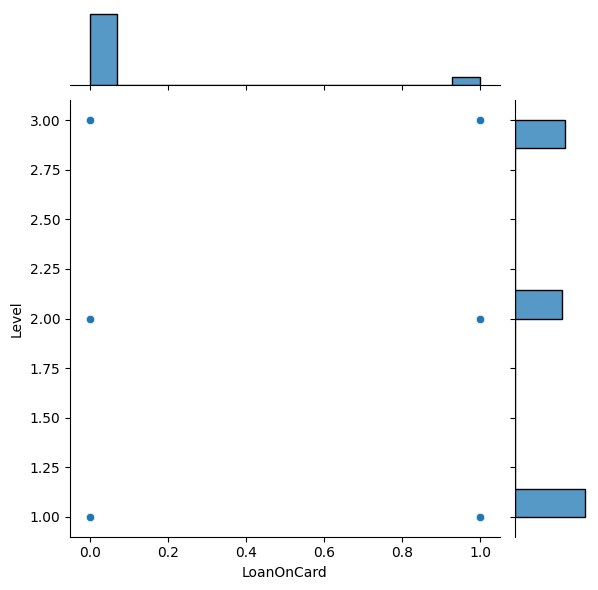

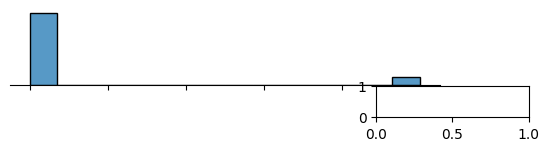

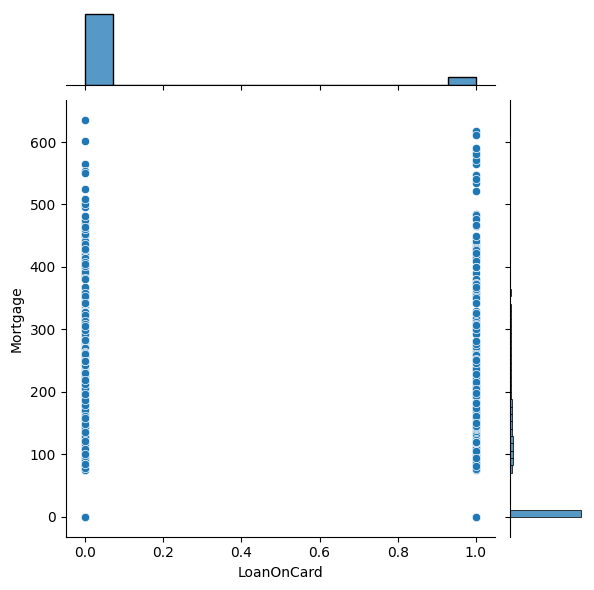

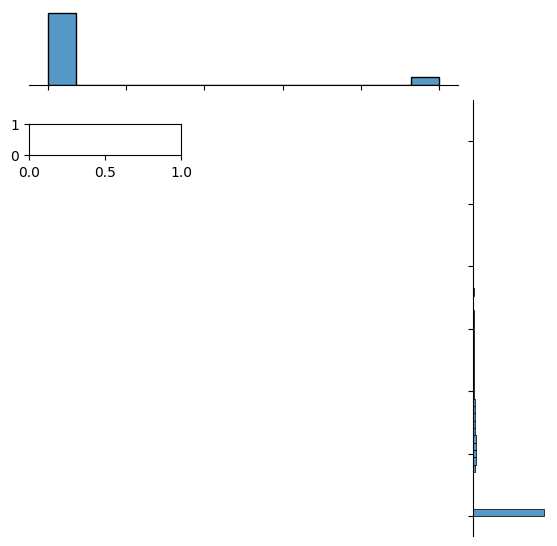

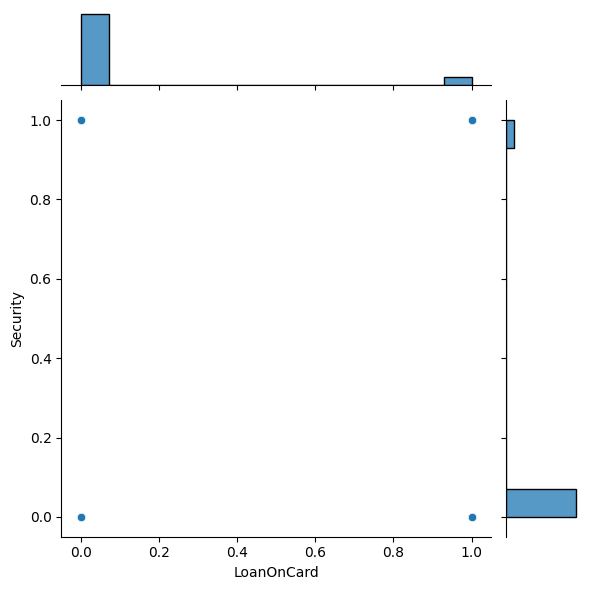

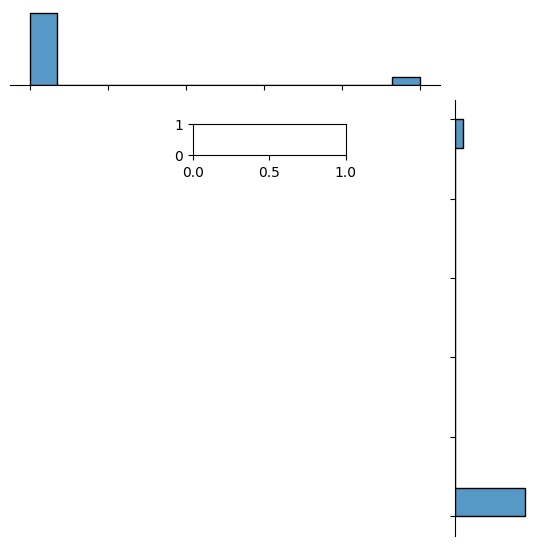

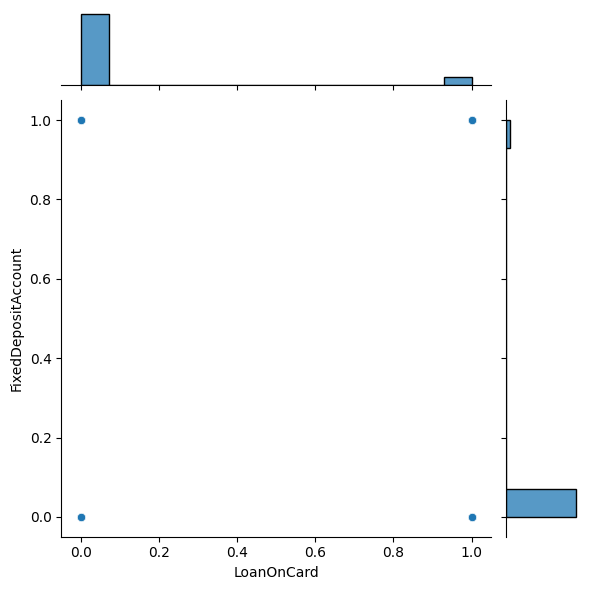

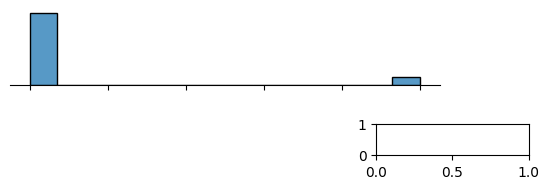

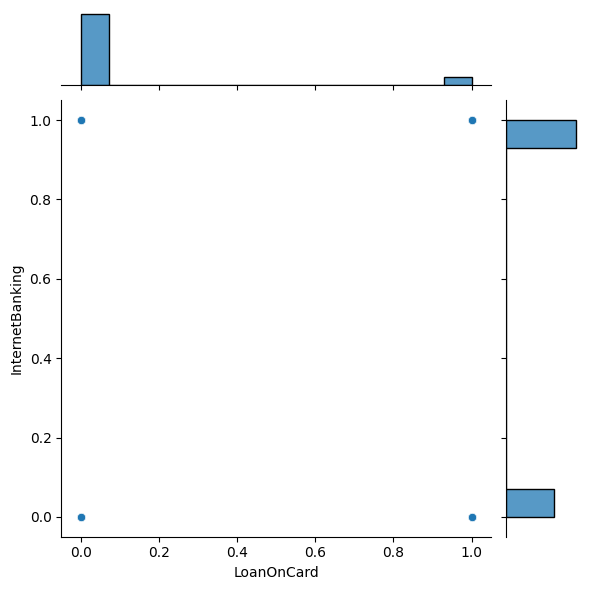

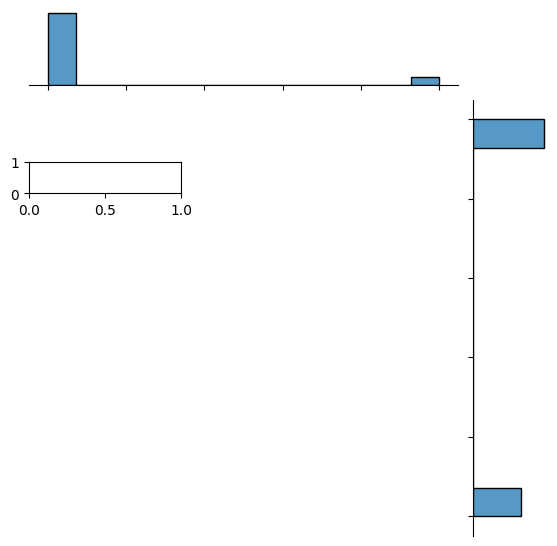

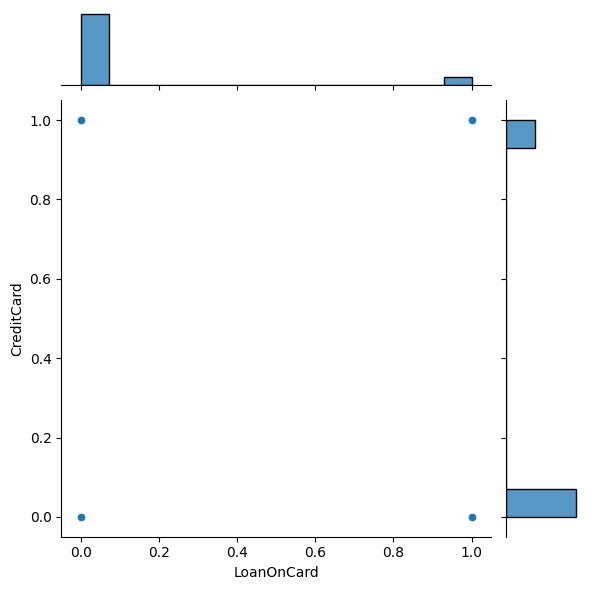

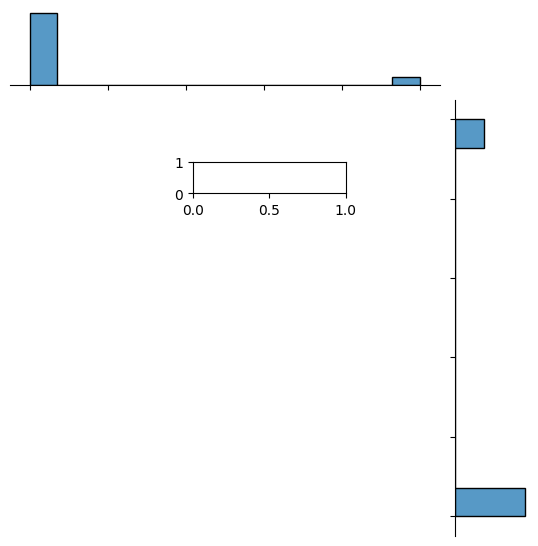

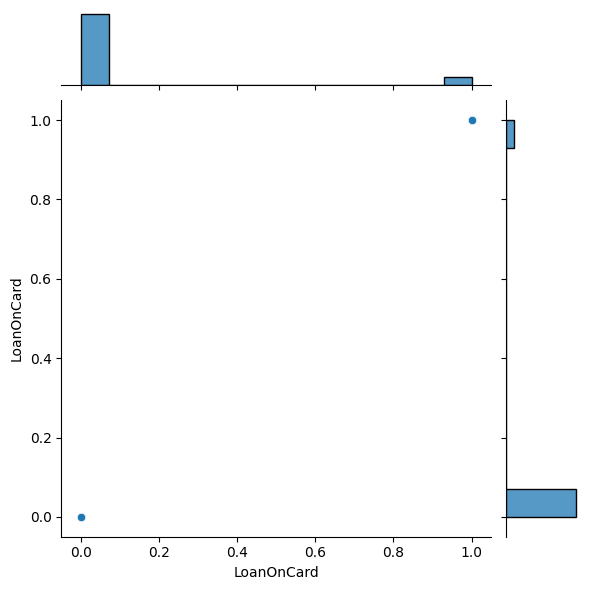

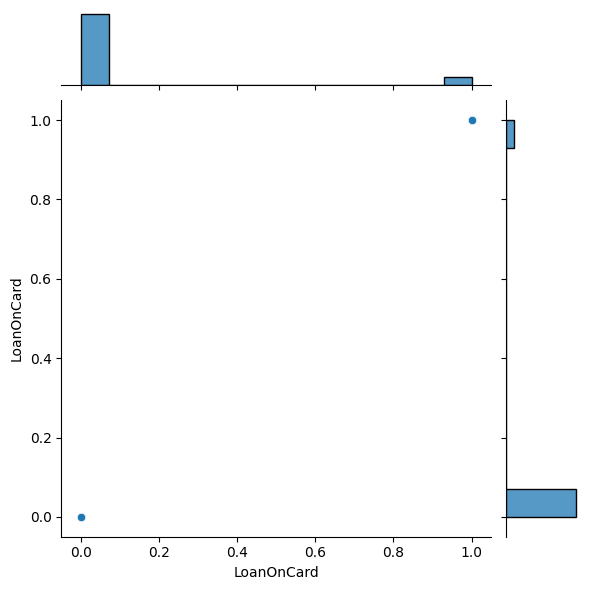

In [ ]:
# Plotting the plots using functions
count = 1
plt.figure(figsize = (15,40))
# heat_map(Single_df)
for element in Single_df:
  plt.subplot(len(Single_df.columns),3,count)
  joint_plot(Single_df,Single_df['LoanOnCard'],element)
  count += 1